# Cardiovacular Risk Prediction
Data obtained from [here](https://www.kaggle.com/code/tumpanjawat/heart-disease-eda-fe-resam-xgboost)

In [2]:
# Suppressing unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing necessary libraries for 3D plotting
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder

# Loading the dataset and first look

In [3]:
# Load the dataset
data = pd.read_csv('CVD_cleaned.csv')

# Display the first few rows of the dataset
data.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [4]:
data.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


## Univariate Analysis

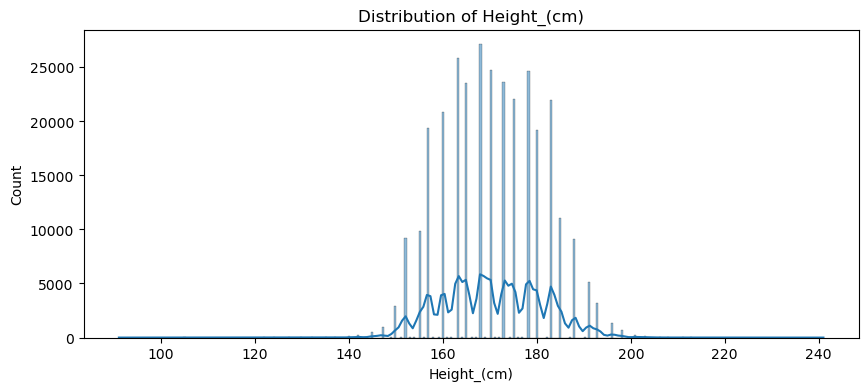

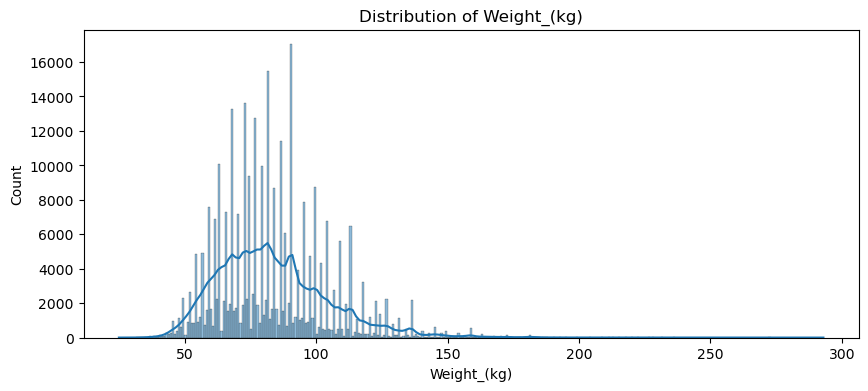

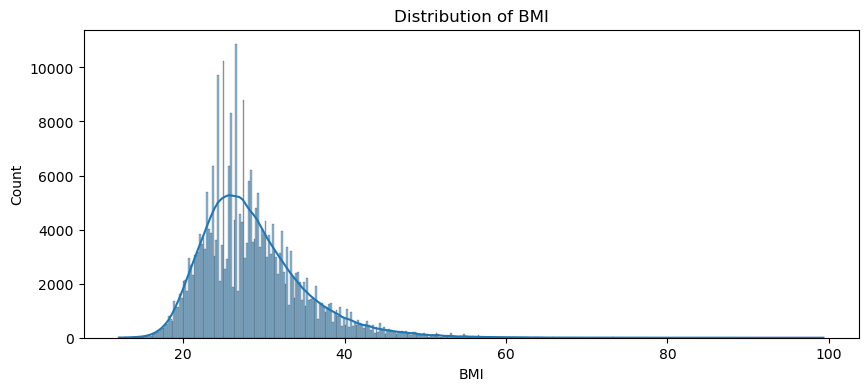

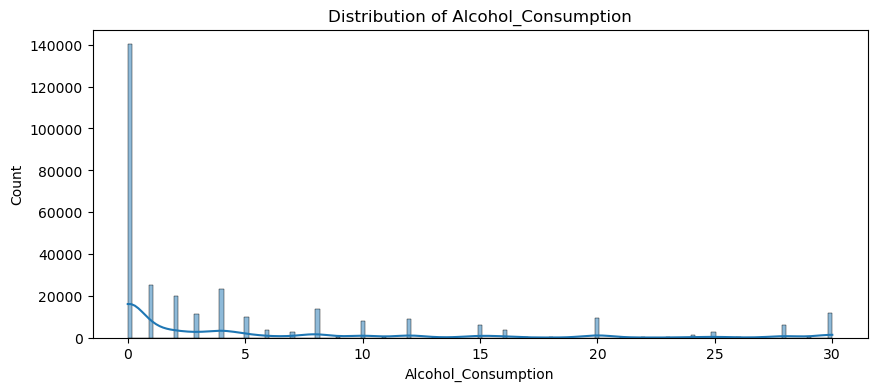

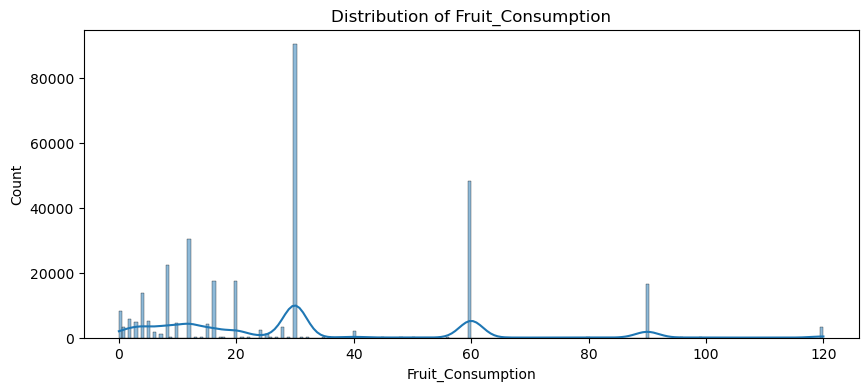

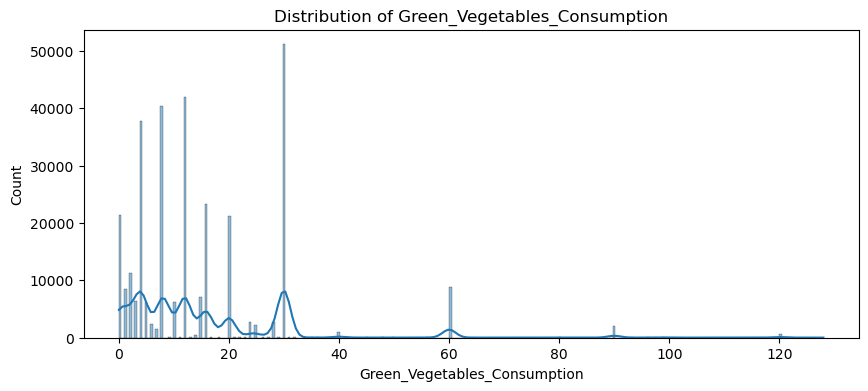

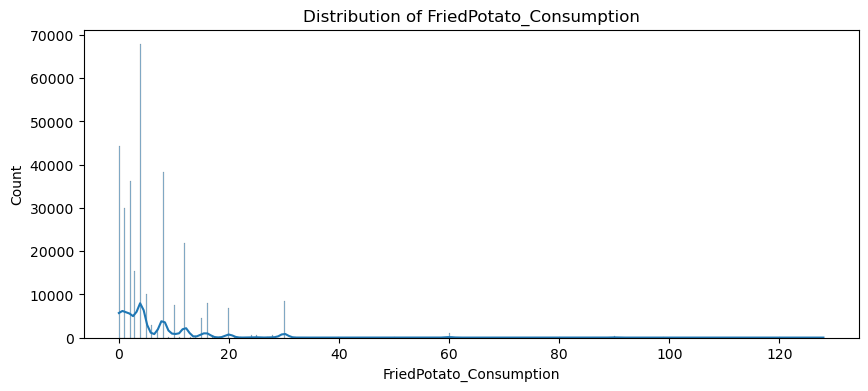

In [8]:
# Numerical Variables 
# Checking the distribution of numerical features
numerical_features = ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']

for feature in numerical_features:
    fig, ax = plt.subplots(1, 1, figsize = (10, 4))
    sns.histplot(data = data, x = feature, kde = True)
    ax.set_title('Distribution of ' + feature)
    plt.show()

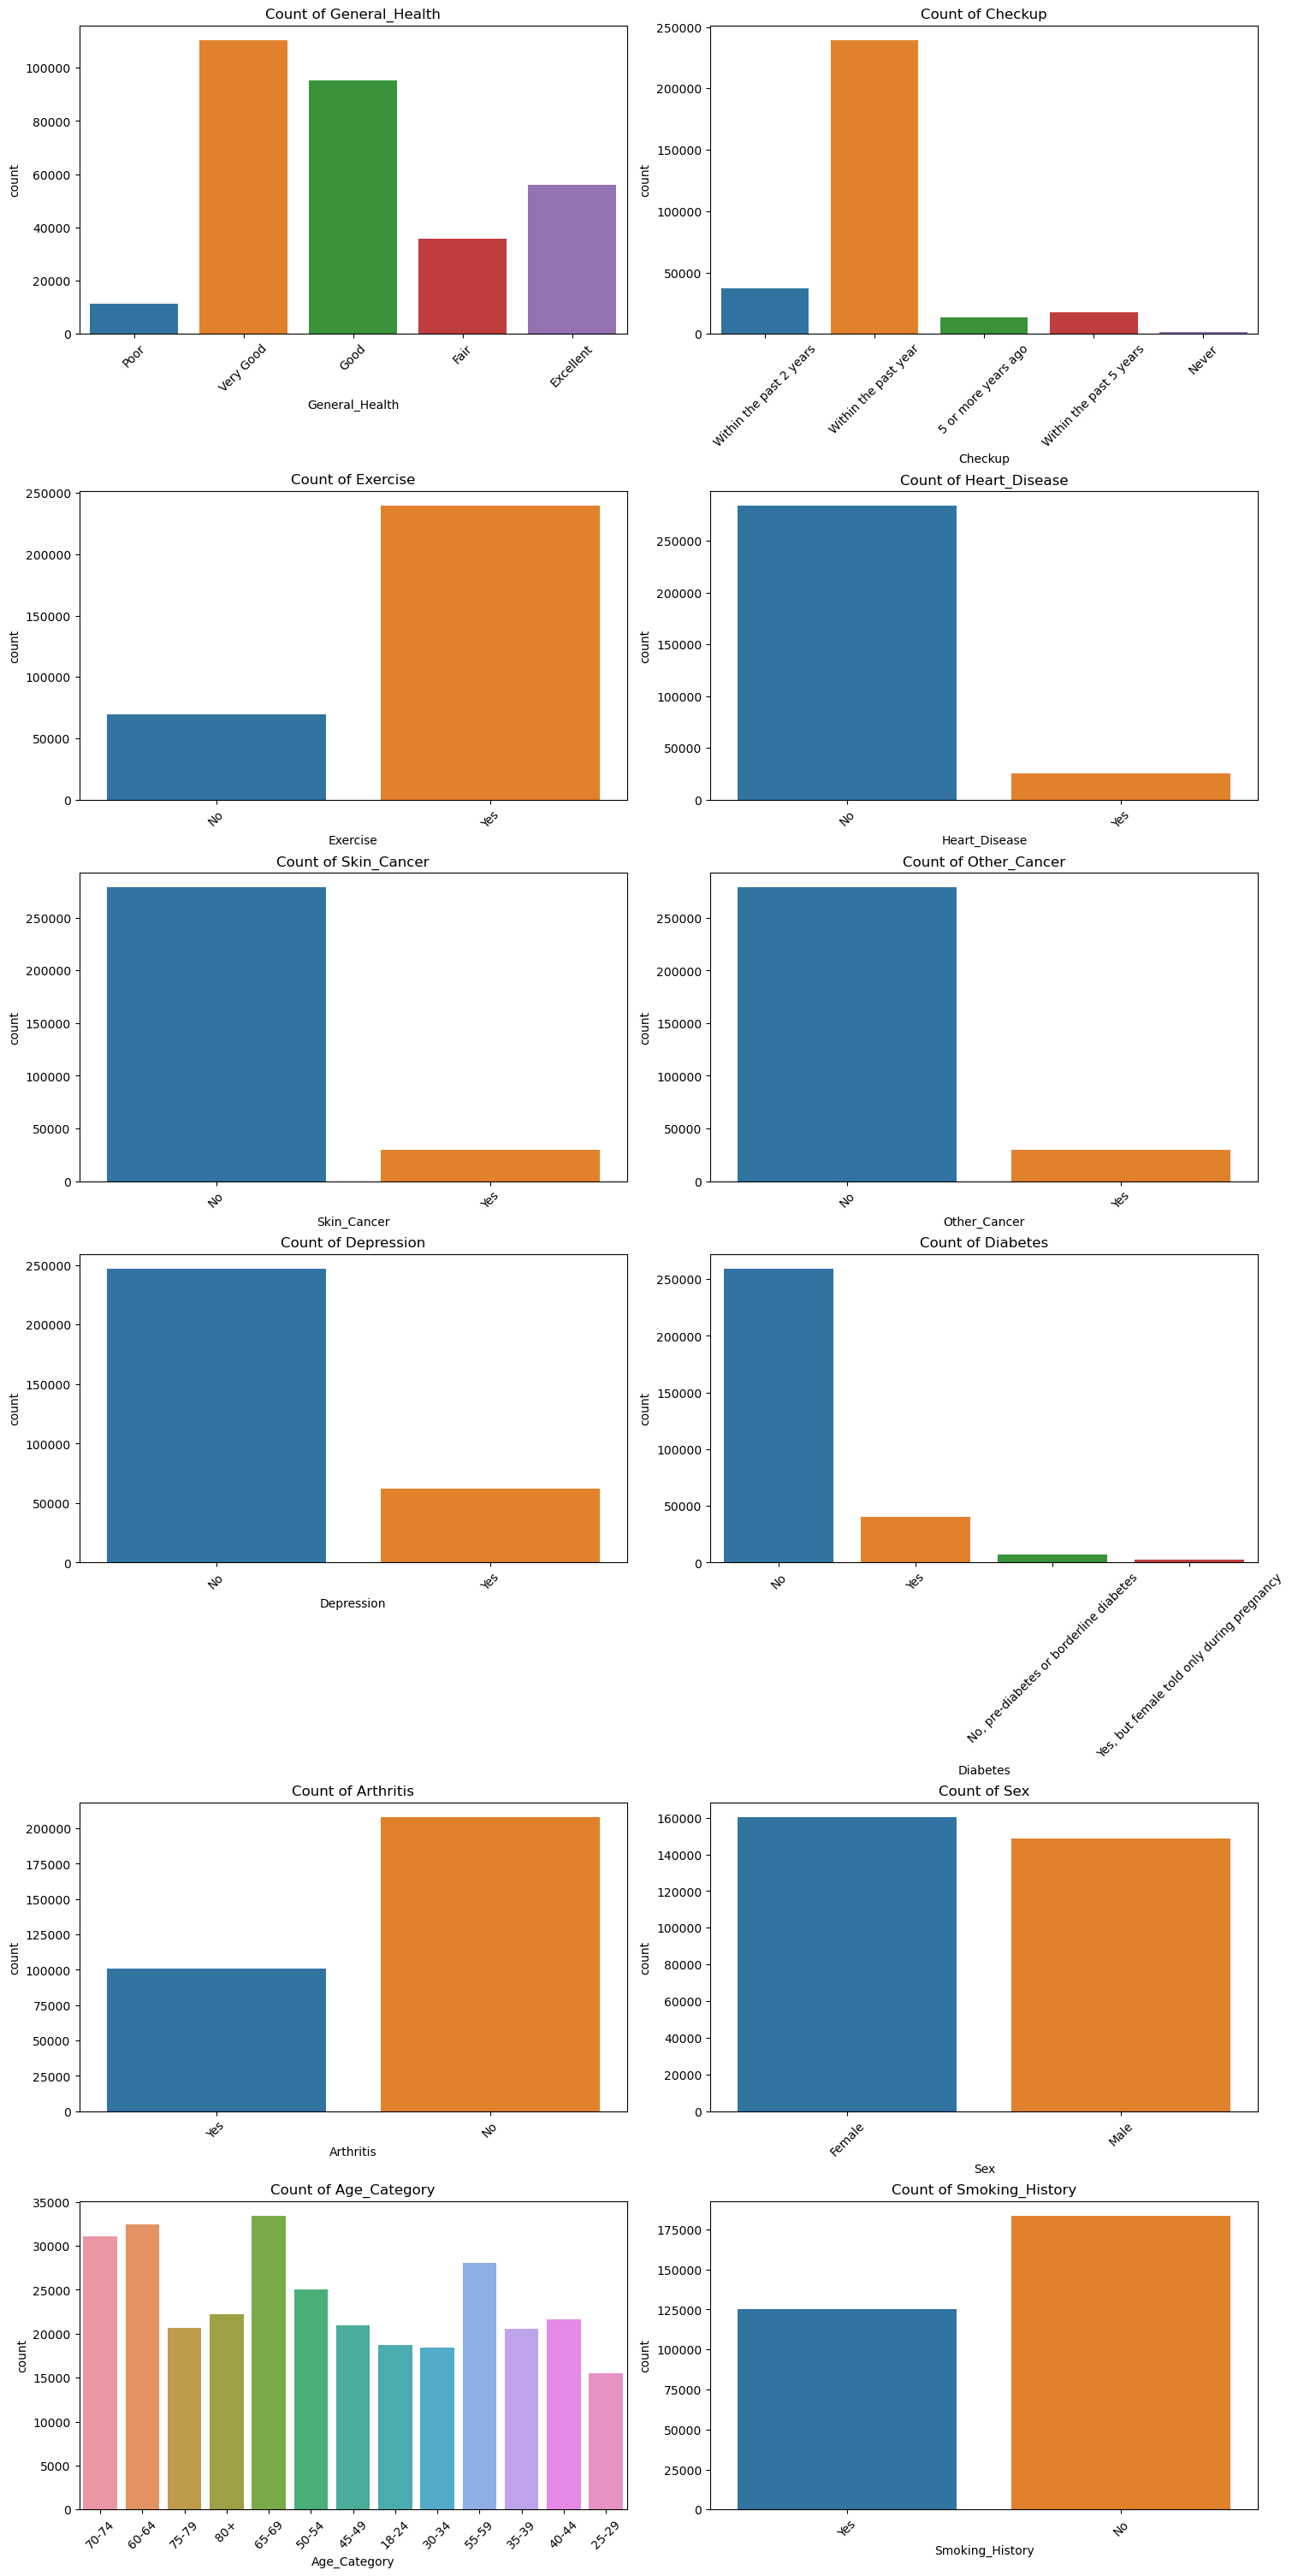

In [16]:
# Categorical Variables 
# Checking the distribution of categorical features
categorical_features = ['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category', 'Smoking_History']

num_subplots = len(categorical_features)
num_rows = int((num_subplots + 1) / 2)

fig, axs = plt.subplots(num_rows, 2, figsize = (15, num_rows * 5), layout = 'constrained')

axs = axs.flatten() if num_rows > 1 else [axs]

for i, feature in enumerate(categorical_features):
    sns.countplot(data = data, x = feature, ax = axs[i])
    axs[i].set_title('Count of ' + feature)
    axs[i].tick_params(axis='x', labelrotation = 45)  

plt.show()

## Bivariate Analysis

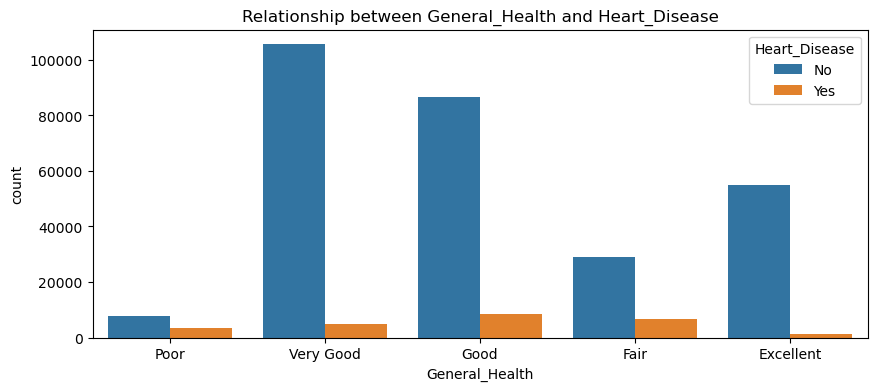

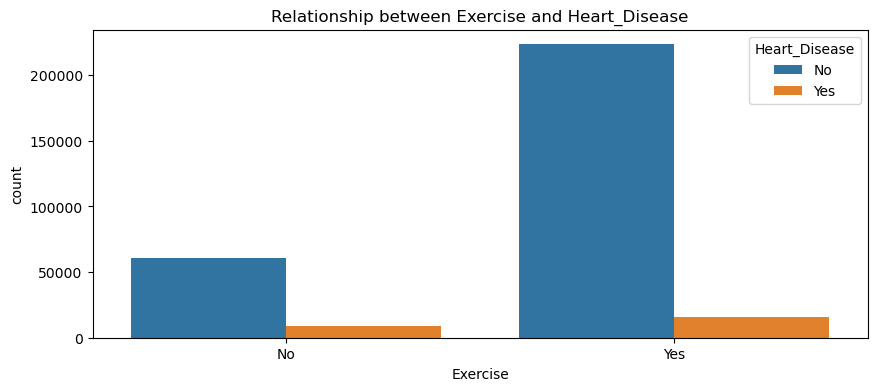

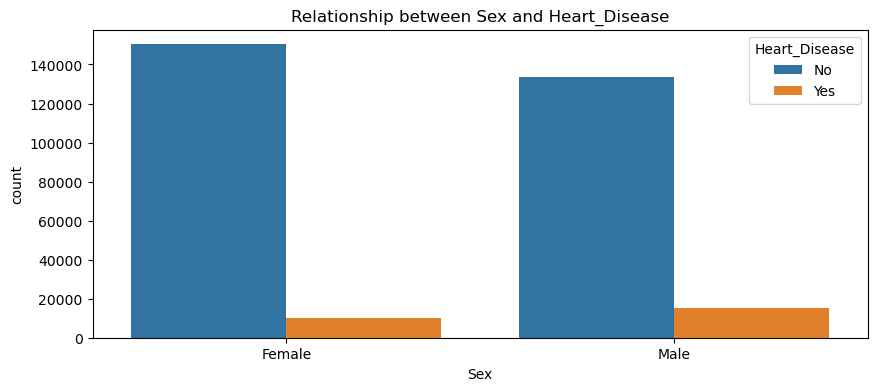

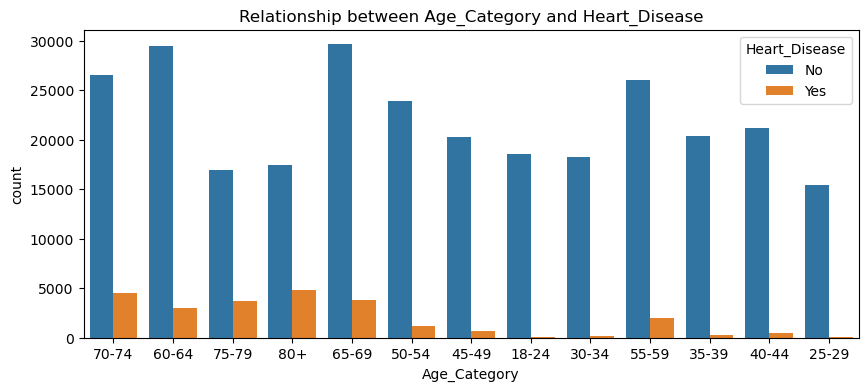

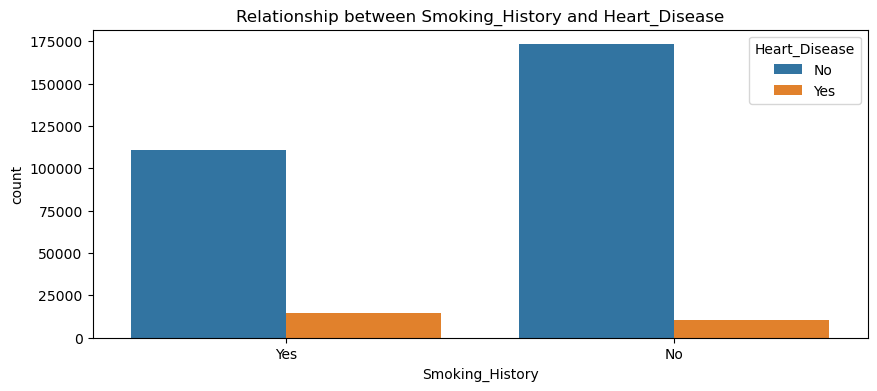

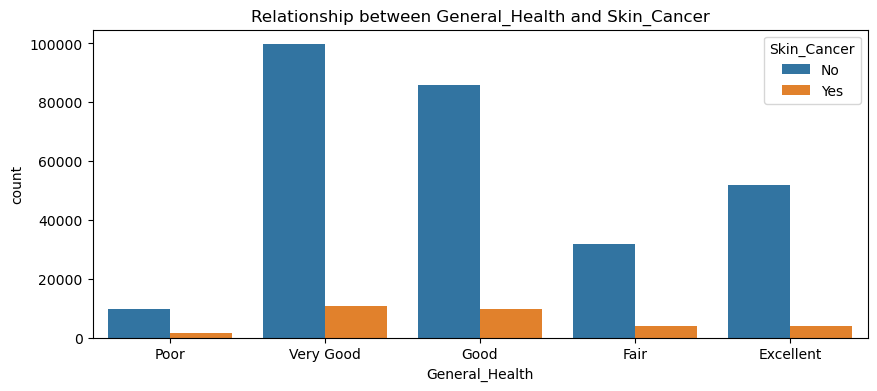

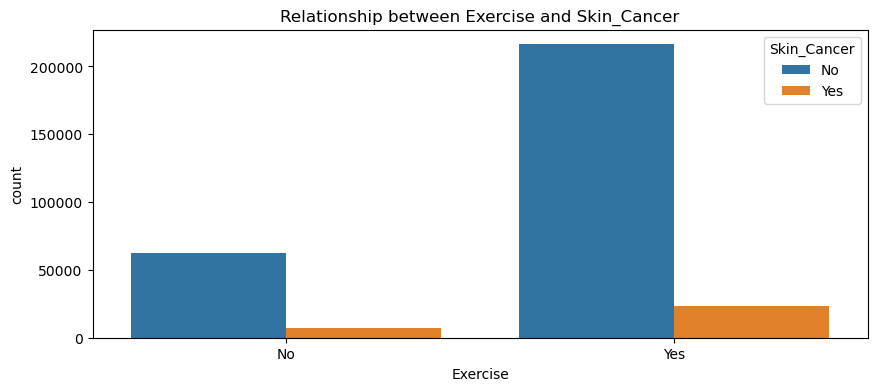

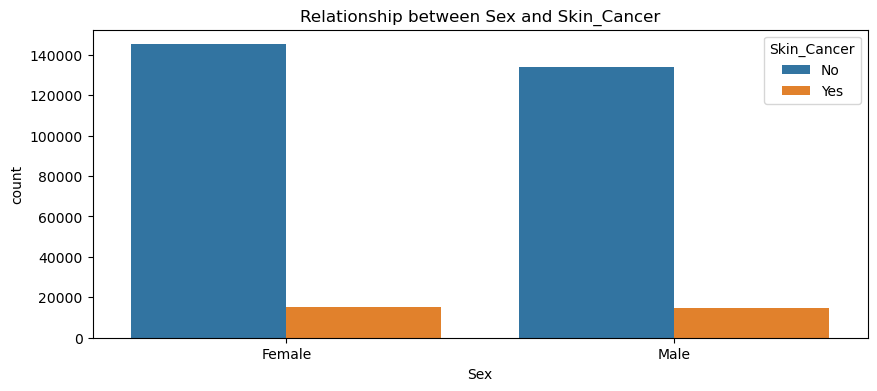

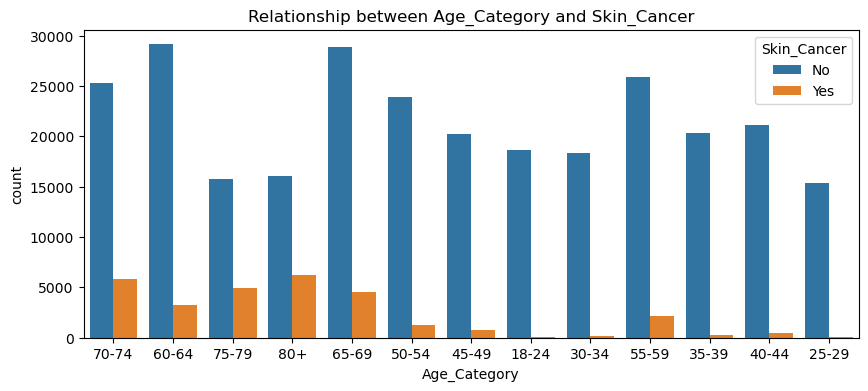

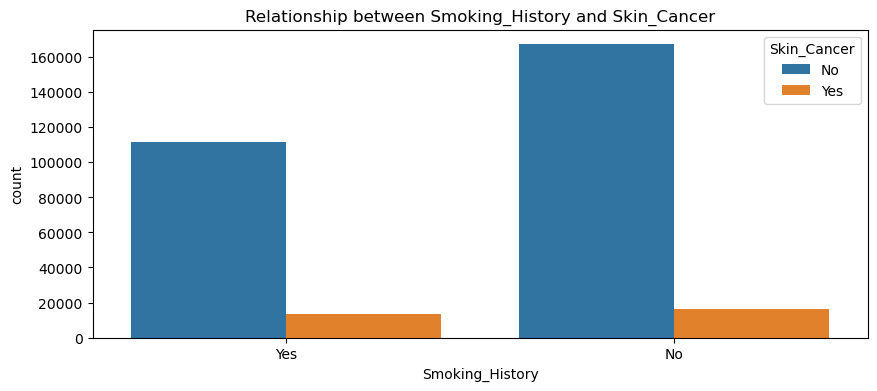

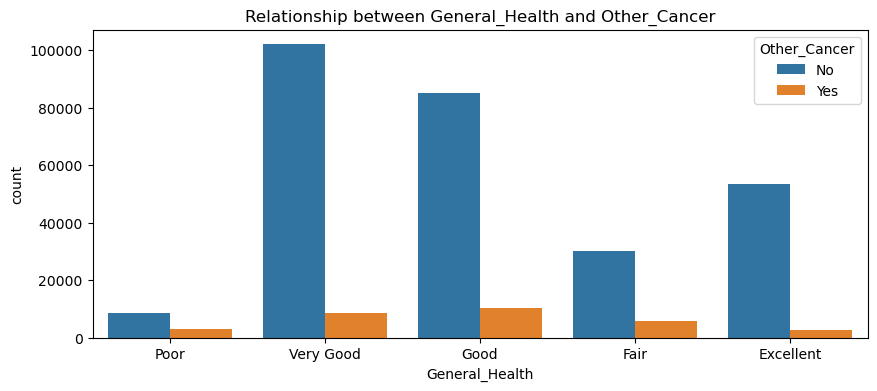

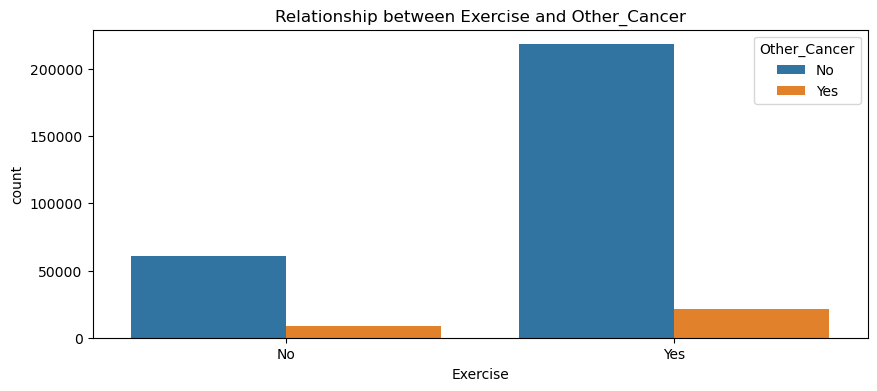

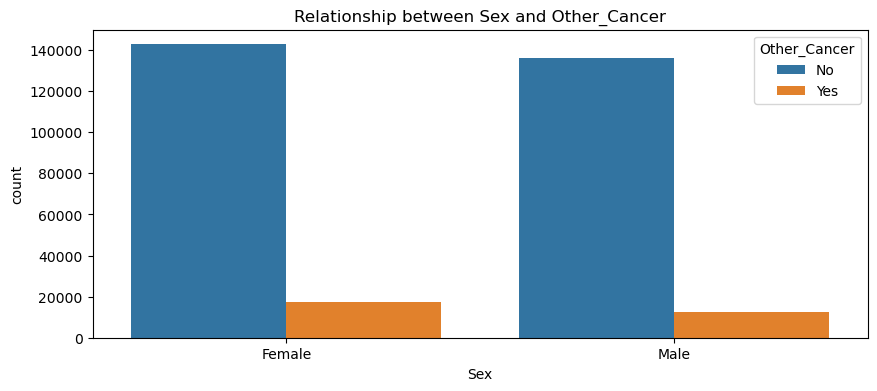

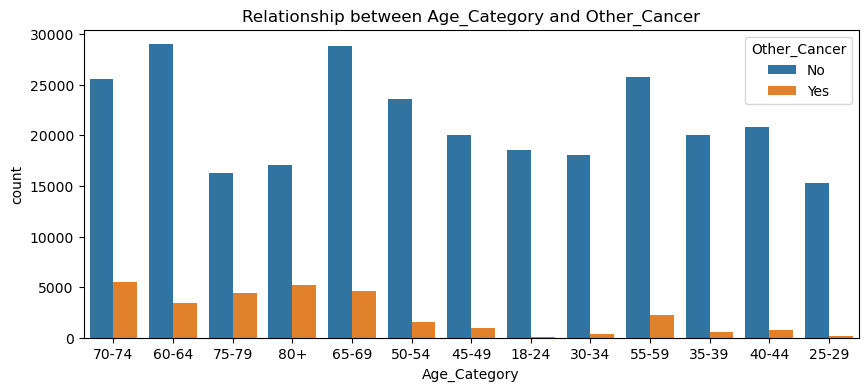

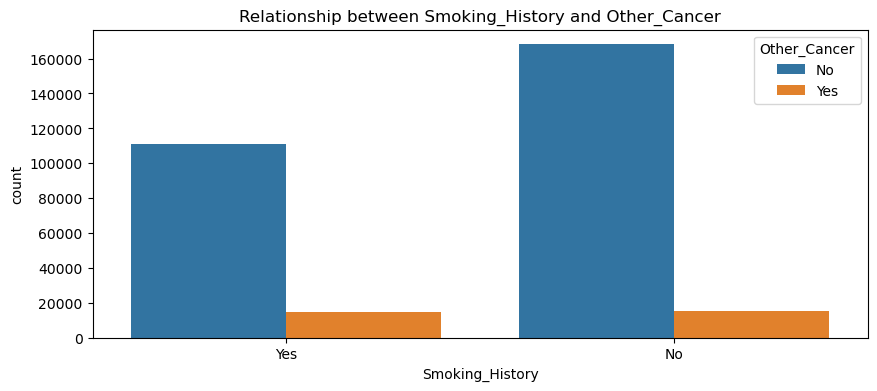

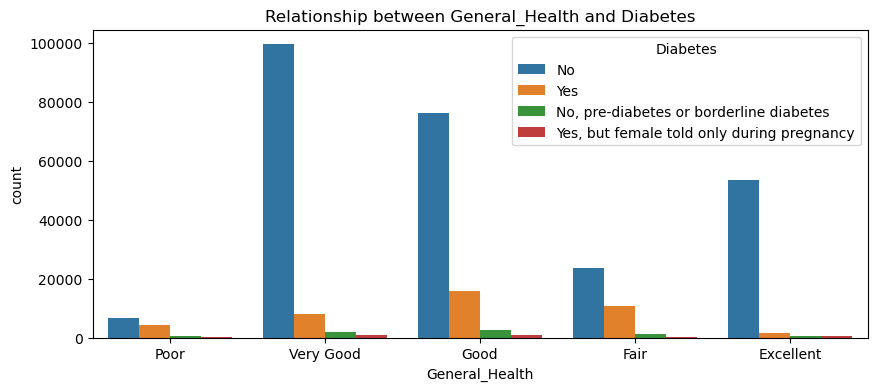

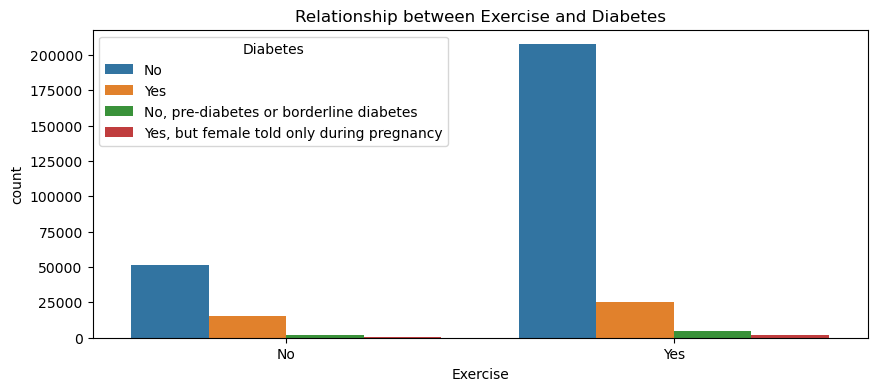

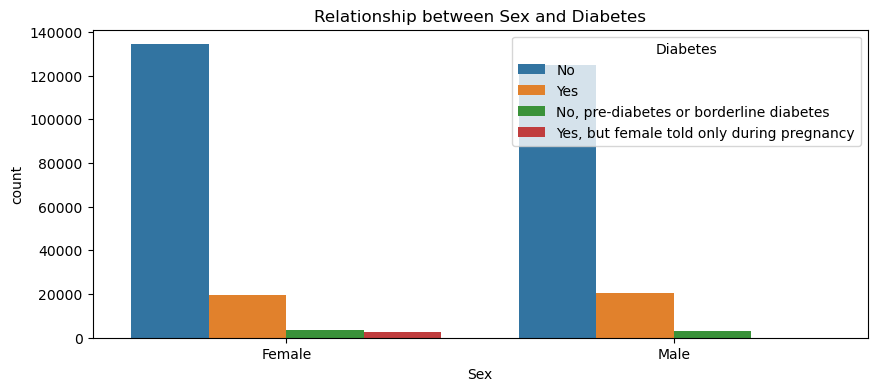

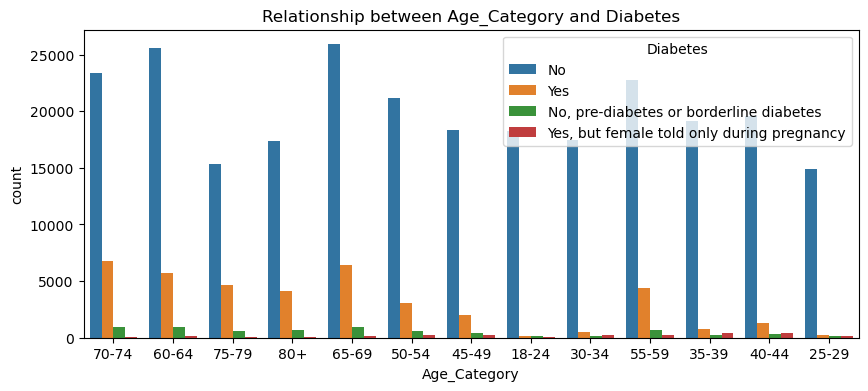

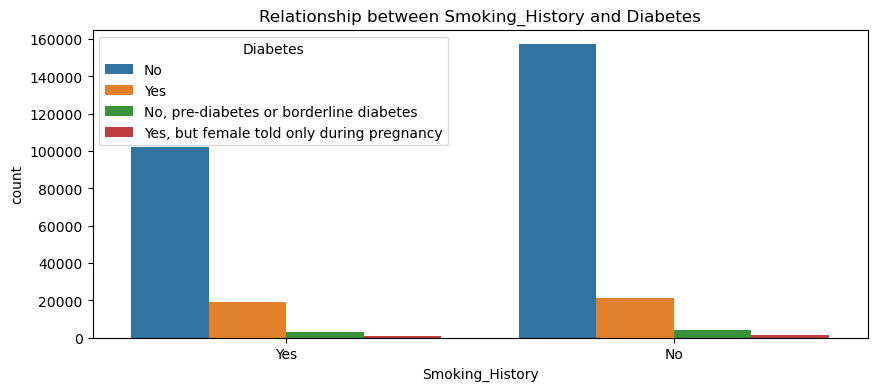

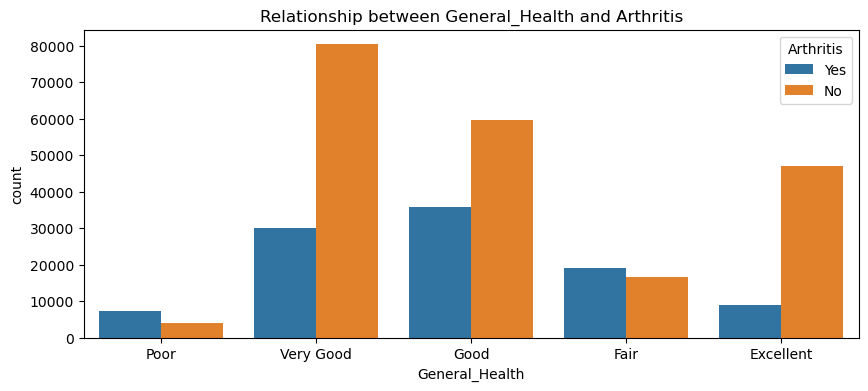

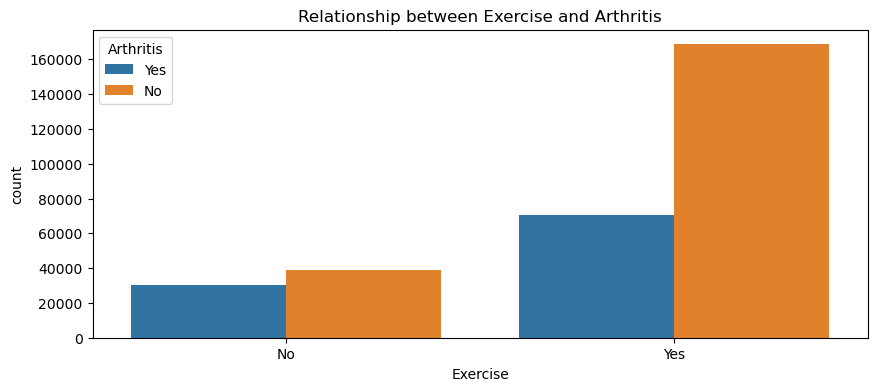

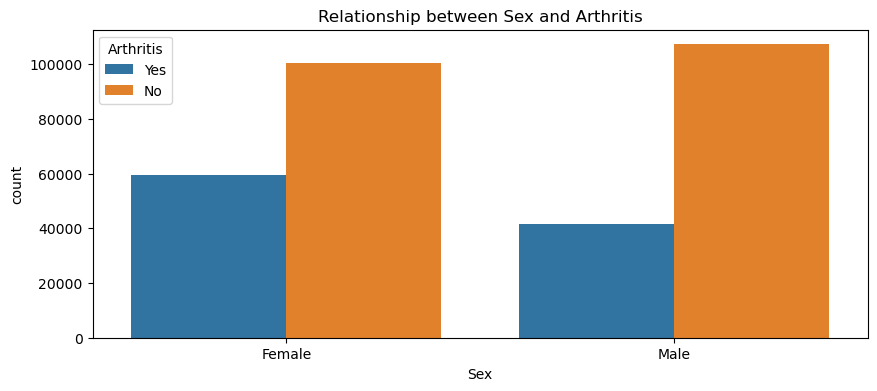

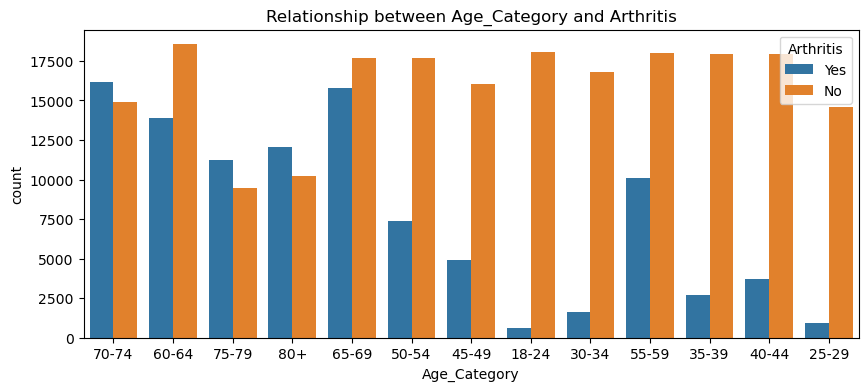

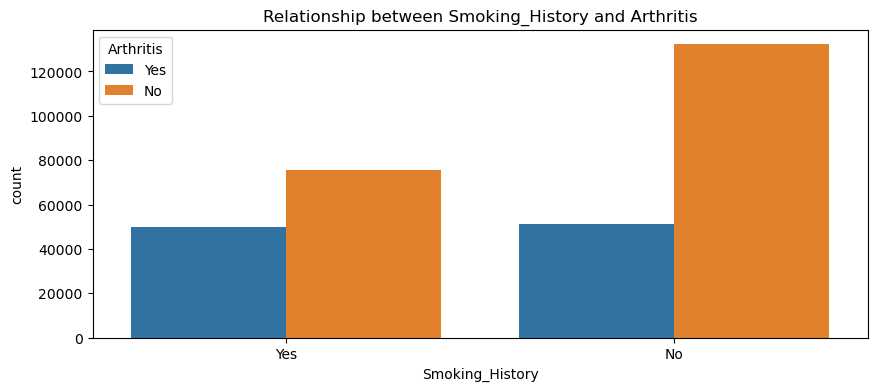

In [5]:
# Analyzing the relationship between disease conditions and selected variables
selected_variables = ['General_Health', 'Exercise', 'Sex', 'Age_Category', 'Smoking_History']
disease_conditions = ['Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Diabetes', 'Arthritis']

for disease in disease_conditions:
    for variable in selected_variables:
        fig, ax = plt.subplots(1, 1, figsize = (10, 4))
        sns.countplot(data=data, x=variable, hue=disease)
        ax.set_title('Relationship between ' + variable + ' and ' + disease)
        plt.show()

## Multivariate Analysis

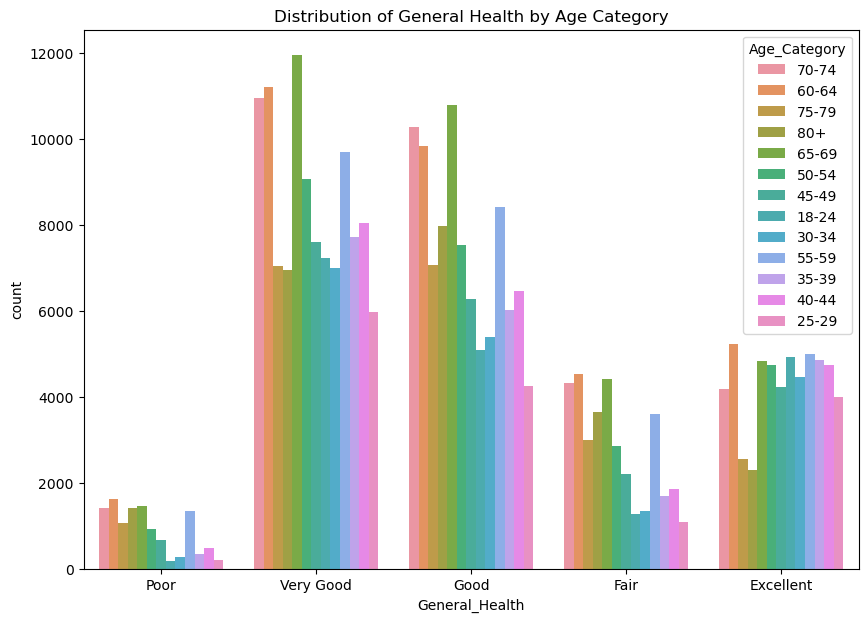

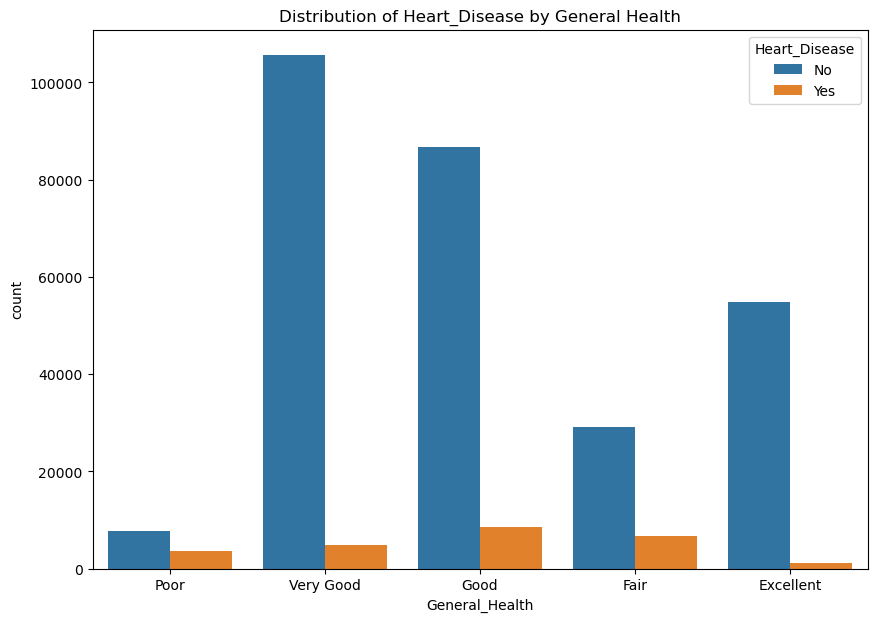

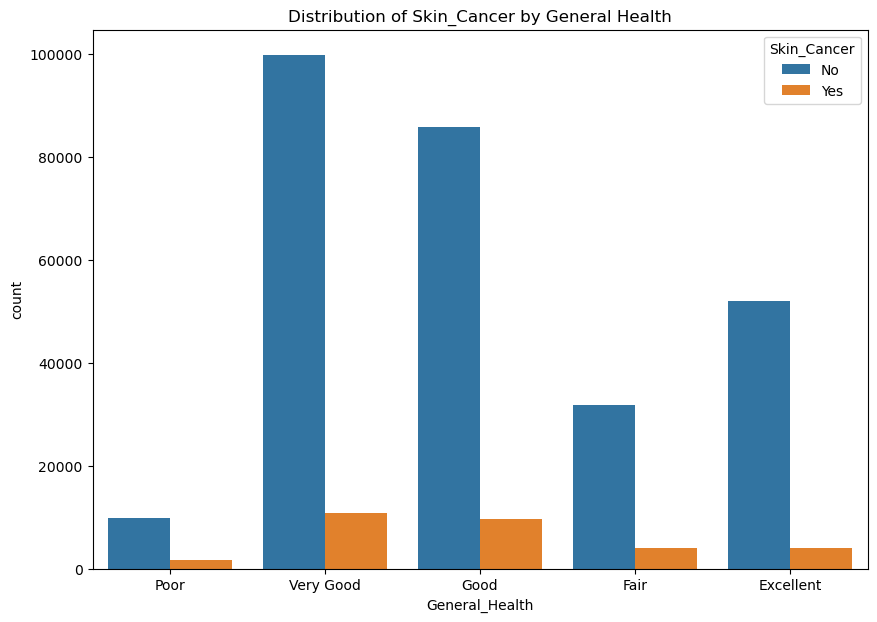

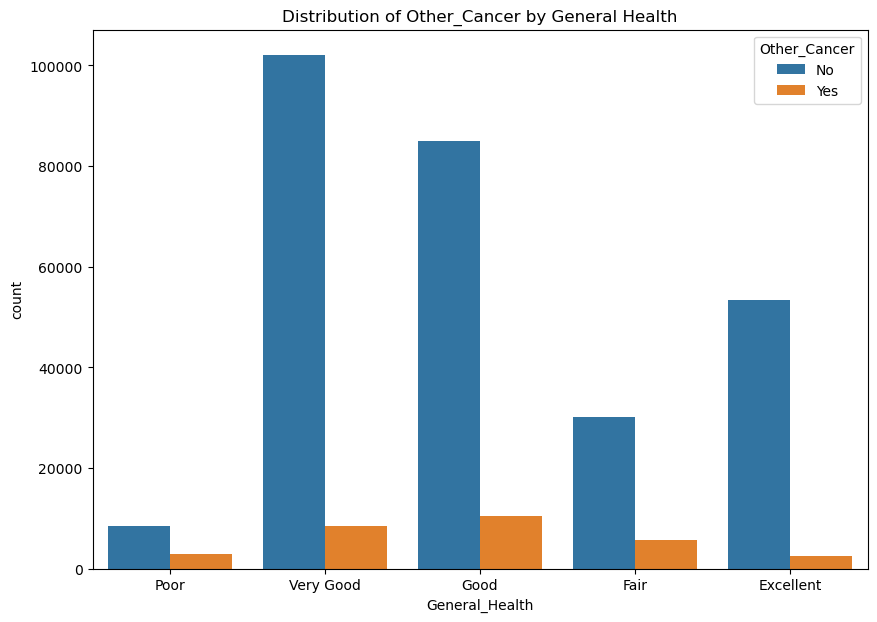

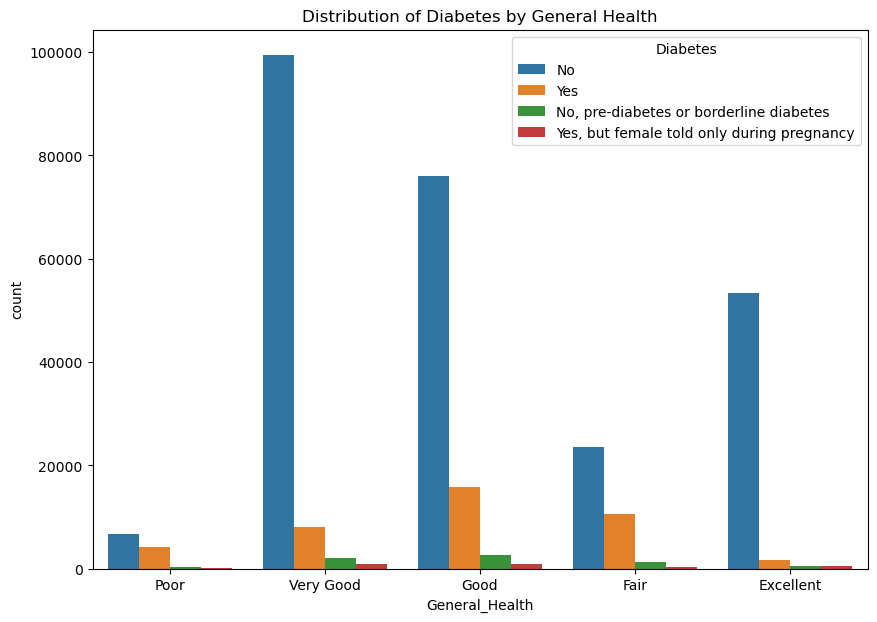

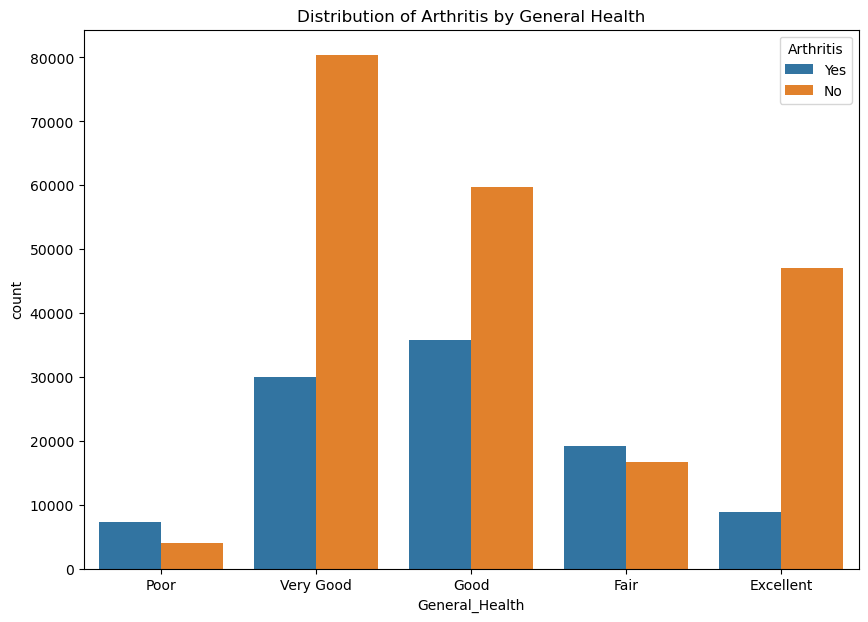

In [7]:
# General Variables
# Analyzing the relationship between disease conditions, general health, and age category
fig, ax = plt.subplots(1, 1, figsize = (10, 7))
sns.countplot(data=data, x='General_Health', hue='Age_Category')
ax.set_title('Distribution of General Health by Age Category')
plt.show()

for disease in disease_conditions:
    fig, ax = plt.subplots(1, 1, figsize = (10, 7))
    sns.countplot(data = data, x = 'General_Health', hue = disease)
    ax.set_title('Distribution of ' + disease + ' by General Health')
    plt.show()

## 3D plot: Age, General Health and BMI

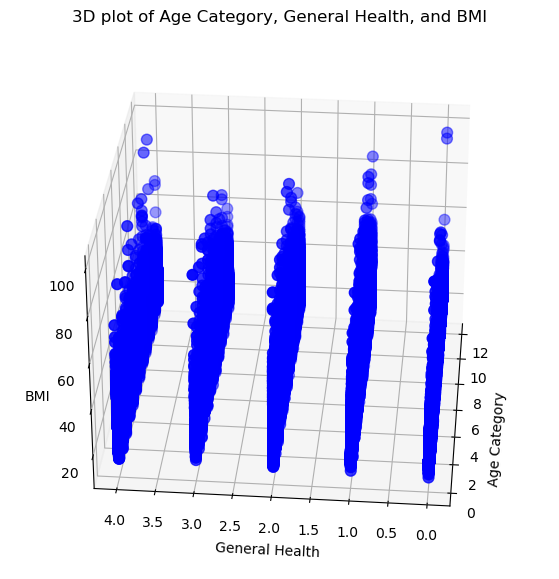

In [8]:
# Encode categorical variables for 3D plotting
label_encoder = LabelEncoder()

# Selecting features for 3D plot: Age_Category, General_Health, and BMI
data_3D = data[['Age_Category', 'General_Health', 'BMI']].copy()

# Encode categorical variables
data_3D['Age_Category'] = label_encoder.fit_transform(data_3D['Age_Category'])
data_3D['General_Health'] = label_encoder.fit_transform(data_3D['General_Health'])

# Create the 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_3D['Age_Category'], data_3D['General_Health'], data_3D['BMI'], c='blue', s=60)
ax.view_init(30, 185)
plt.xlabel("Age Category")
plt.ylabel("General Health")
ax.set_zlabel('BMI')
plt.title('3D plot of Age Category, General Health, and BMI')
plt.show()

# Data Preprocessing

In [10]:
# Mapping for Diabetes
diabetes_mapping = {'No': 0, 'No, pre-diabetes or borderline diabetes': 0, 'Yes, but female told only during pregnancy': 1, 'Yes': 1}
data['Diabetes'] = data['Diabetes'].map(diabetes_mapping)

In [11]:
# One-hot encoding for Sex
data = pd.get_dummies(data, columns=['Sex'])

In [12]:
# Convert remaining categorical variables with "Yes" and "No" values to binary format for correlation computation
binary_columns = ['Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Arthritis', 'Smoking_History', 'Exercise']

for column in binary_columns:
    data[column] = data[column].map({'Yes': 1, 'No': 0})

In [13]:
# Ordinal encoding for General_Health, Checkup, Age_Category
general_health_mapping = {'Poor': 0, 'Fair': 1, 'Good': 2, 'Very Good': 3, 'Excellent': 4}
data['General_Health'] = data['General_Health'].map(general_health_mapping)

checkup_mapping = {'Never': 0, '5 or more years ago': 0.2, 'Within the past 5 years': 1, 'Within the past 2 years': 2, 'Within the past year': 4}
data['Checkup'] = data['Checkup'].map(checkup_mapping)

age_category_mapping = {'18-24': 0, '25-29': 1, '30-34': 2, '35-39': 3, '40-44': 4, '45-49': 5, '50-54': 6, '55-59': 7, '60-64': 8, '65-69': 9, '70-74': 10, '75-79': 11, '80+': 12}
data['Age_Category'] = data['Age_Category'].map(age_category_mapping)

## Data cleaning

In [15]:
# Count duplicates
duplicate_count = data.duplicated().sum()

# Print the count
print("Number of duplicates:", duplicate_count)

# Remove duplicate rows
data = data.drop_duplicates()

In [21]:
# Check for missing values in each column
data.isnull().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
Sex_Female                      0
Sex_Male                        0
dtype: int64

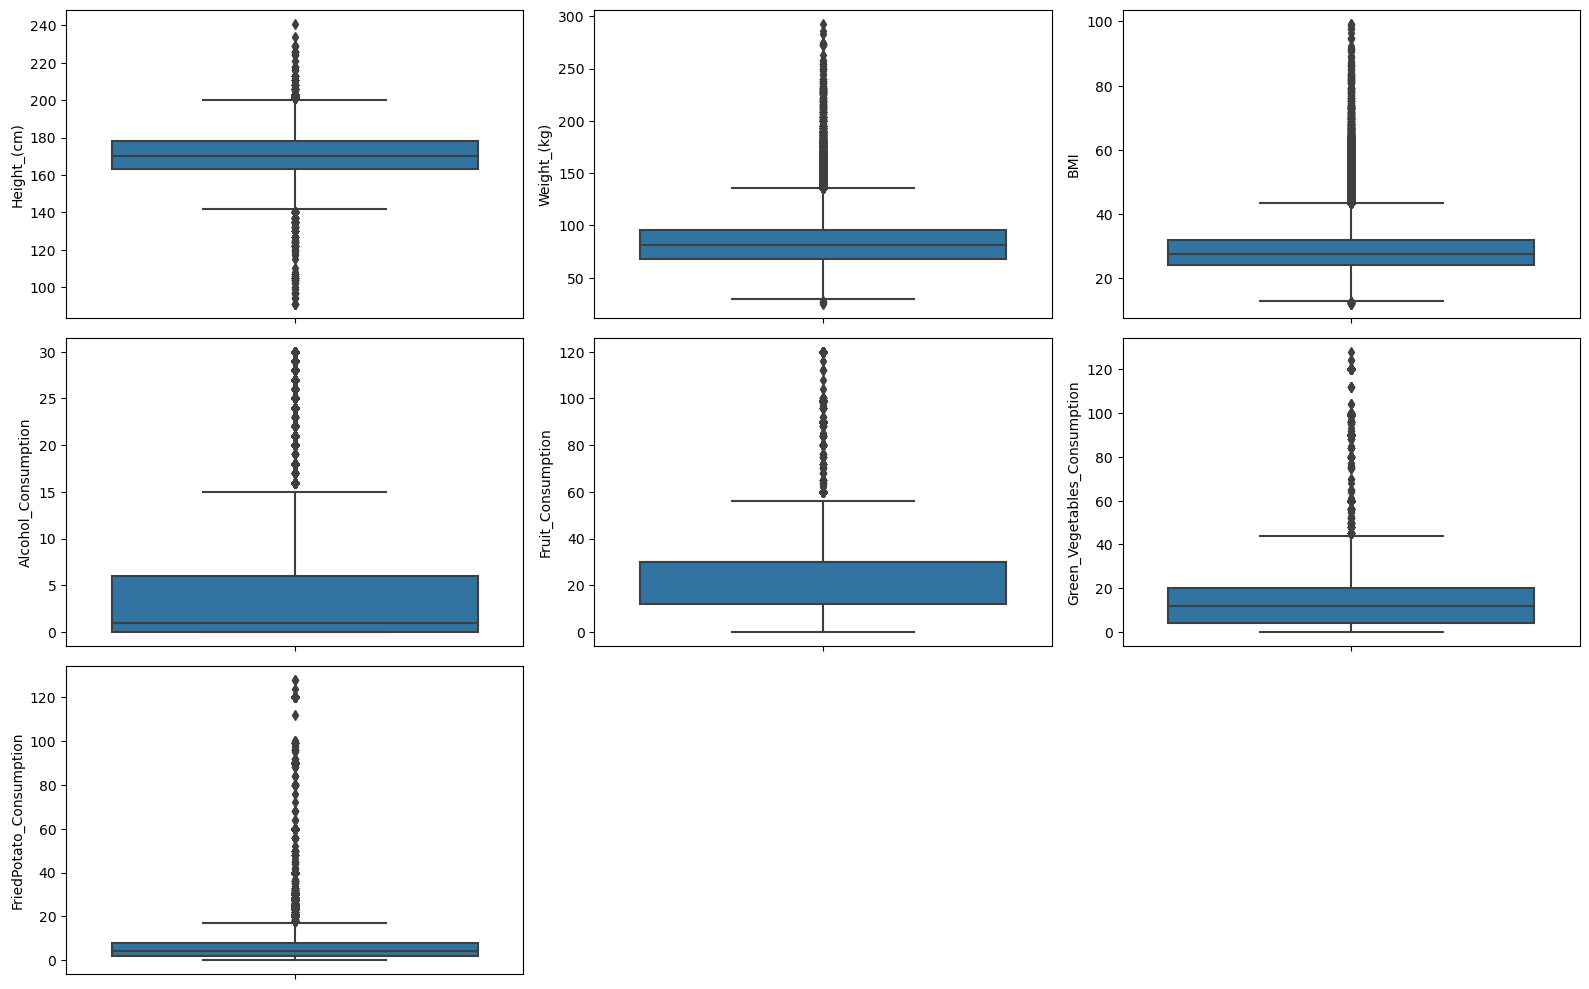

In [22]:
# Checking for outliers
# List of numerical columns
numerical_cols = ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']

# Create box plots
plt.figure(figsize=(16, 10))
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=data[column])

plt.tight_layout()

In [23]:
# Summary statistics
summary_stats = data[numerical_cols].describe()
summary_stats

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308771.000000,308771.000000,308771.000000,308771.000000,308771.000000,308771.000000,308771.000000
mean,170.615297,83.590514,28.626828,5.097606,29.834191,15.109431,6.297259
std,10.658466,21.344691,6.522826,8.200459,24.877874,14.926935,8.583870
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


In [16]:
# Display the first few rows of the cleaned dataset
data.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Sex_Female,Sex_Male
0,0,2.0,0,0,0,0,0,0,1,10,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0,1,0
1,3,4.0,0,1,0,0,0,1,0,10,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0,1,0
2,3,4.0,1,0,0,0,0,1,0,8,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0,1,0
3,0,4.0,1,1,0,0,0,1,0,11,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0,0,1
4,2,4.0,0,0,0,0,0,0,0,12,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0,0,1


# Data Preparation
## Feature Engineering

In [ ]:
# BMI Category
data['BMI_Category'] = pd.cut(data['BMI'], bins=[0, 18.5, 24.9, 29.9, np.inf], labels=['Underweight', 'Normal weight', 'Overweight', 'Obesity'])

In [ ]:
# Health Checkup Frequency
checkup_mapping = {'Within the past year': 4, 'Within the past 2 years': 2, 'Within the past 5 years': 1, '5 or more years ago': 0.2, 'Never': 0}
data['Checkup_Frequency'] = data['Checkup'].replace(checkup_mapping)

In [ ]:
# Lifestyle Score
exercise_mapping = {'Yes': 1, 'No': 0}
smoking_mapping = {'Yes': -1, 'No': 0}
data['Lifestyle_Score'] = data['Exercise'].replace(exercise_mapping) - data['Smoking_History'].replace(smoking_mapping) + data['Fruit_Consumption'] / 10 + data['Green_Vegetables_Consumption'] / 10 - data['Alcohol_Consumption'] / 10

In [ ]:
# Healthy Diet Score
data['Healthy_Diet_Score'] = data['Fruit_Consumption'] / 10 + data['Green_Vegetables_Consumption'] / 10 - data['FriedPotato_Consumption'] / 10

In [ ]:
# Interaction Terms
data['Smoking_Alcohol'] = data['Smoking_History'].replace(smoking_mapping) * data['Alcohol_Consumption']
data['Checkup_Exercise'] = data['Checkup_Frequency'] * data['Exercise'].replace(exercise_mapping)

In [ ]:
# Ratio of Height to Weight
data['Height_to_Weight'] = data['Height_(cm)'] / data['Weight_(kg)']

In [ ]:
# Fruit and Vegetables Consumption Interaction
data['Fruit_Vegetables'] = data['Fruit_Consumption'] * data['Green_Vegetables_Consumption']

In [ ]:
# Healthy_Diet_Lifestyle Interaction
data['HealthyDiet_Lifestyle'] = data['Healthy_Diet_Score'] * data['Lifestyle_Score']

In [ ]:
# Alcohol_FriedPotato Interaction
data['Alcohol_FriedPotato'] = data['Alcohol_Consumption'] * data['FriedPotato_Consumption']

## Feature Preprocessing

In [ ]:
# Mapping for Diabetes
diabetes_mapping = {'No': 0, 'No, pre-diabetes or borderline diabetes': 0, 'Yes, but female told only during pregnancy': 1, 'Yes': 1}
data['Diabetes'] = data['Diabetes'].map(diabetes_mapping)

In [ ]:
# One-hot encoding for Sex
data = pd.get_dummies(data, columns=['Sex'])

In [ ]:
# Convert remaining categorical variables with "Yes" and "No" values to binary format for correlation computation
binary_columns = ['Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Arthritis', 'Smoking_History', 'Exercise']

for column in binary_columns:
    data[column] = data[column].map({'Yes': 1, 'No': 0}

In [ ]:
# Ordinal encoding for General_Health, Age_Category, BMI_Category
general_health_mapping = {'Poor': 0, 'Fair': 1, 'Good': 2, 'Very Good': 3, 'Excellent': 4}
data['General_Health'] = data['General_Health'].map(general_health_mapping)

bmi_mapping = {'Underweight': 0, 'Normal weight': 1, 'Overweight': 2, 'Obesity': 3}
data['BMI_Category'] = data['BMI_Category'].map(bmi_mapping).astype(int)

age_category_mapping = {'18-24': 0, '25-29': 1, '30-34': 2, '35-39': 3, '40-44': 4, '45-49': 5, '50-54': 6, '55-59': 7, '60-64': 8, '65-69': 9, '70-74': 10, '75-79': 11, '80+': 12}
data['Age_Category'] = data['Age_Category'].map(age_category_mapping)

In [ ]:
# Drop "Checkup" column
data = data.drop(["Checkup"], axis=1)

# Correlation Matrix

In [17]:
# Compute the correlation matrix
corr = data.corr()

In [18]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

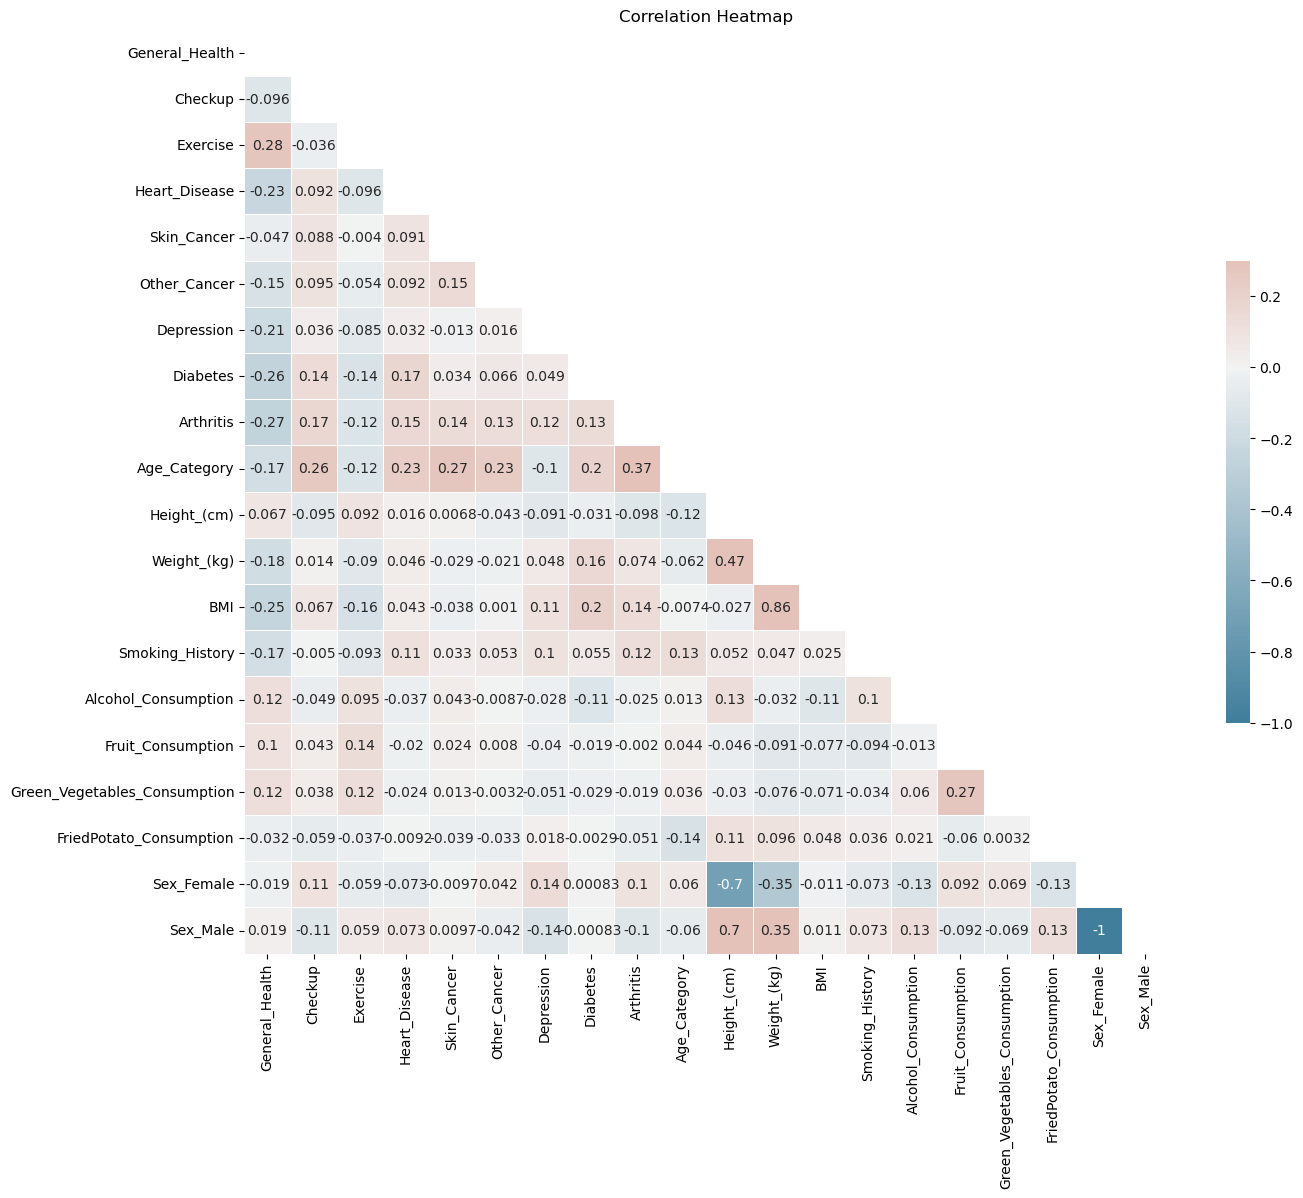

In [19]:
# Set up the matplotlib figure
fig, ax = plt.subplots(1, 1, figsize = (15, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

ax.set_title('Correlation Heatmap')
plt.show()

## Correlation of each feature with the disease variables

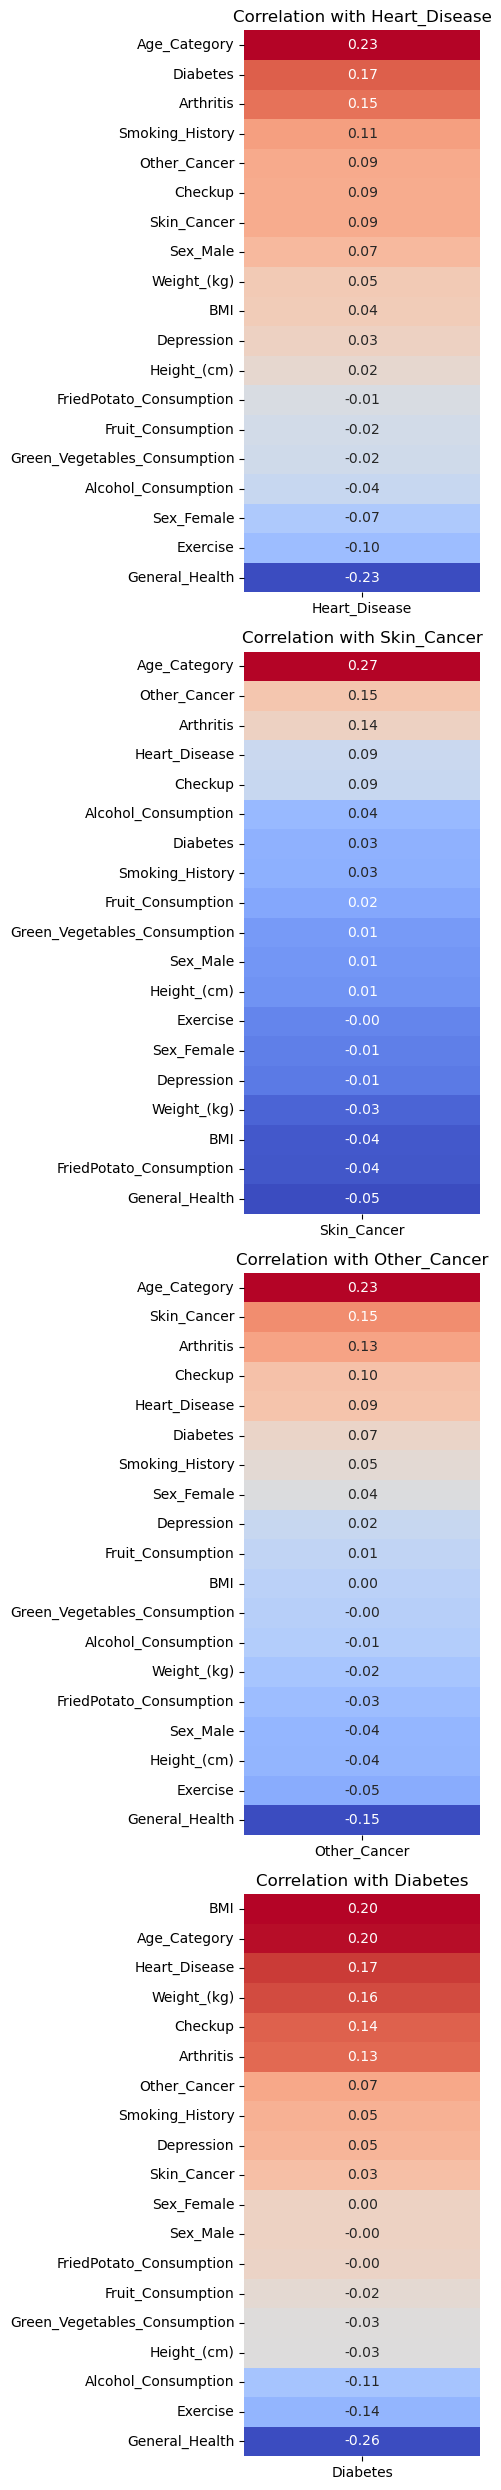

In [20]:
# Compute the correlation of each feature with the disease variables
disease_variables = ['Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Diabetes']

# Compute the correlation matrix
corr = data.corr()

# Create a subplot for each disease
fig, axs = plt.subplots(len(disease_variables), 1, figsize=(5, 25), layout = 'tight')

for ax, disease in zip(axs, disease_variables):
    # Compute the correlation with the disease
    target_corr = corr[disease].drop(disease)

    # Sort correlation values in descending order
    target_corr_sorted = target_corr.sort_values(ascending=False)

    # Plot a heatmap of the correlations with the disease
    sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f', cbar=False, ax=ax)
    ax.set_title('Correlation with ' + disease)

plt.show()

# Gradient Boosting

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import learning_curve

## Data Pipeline

In [ ]:
# Define the features and target
X = data.drop('Heart_Disease', axis=1)
y = data['Heart_Disease']

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Define the pipeline
resampling = SMOTE(sampling_strategy='minority')  # resampling strategy is set to 'minority' to resample the minority class
tomek = TomekLinks(sampling_strategy='majority')  # sampling strategy is set to 'majority' to undersample the majority class
scaler = MinMaxScaler()
model = XGBClassifier(scale_pos_weight=sum(y == 0) / sum(y == 1),  # adjust class weights due to class imbalance
                      eval_metric='logloss',  # use logloss to evaluate performance
                      use_label_encoder=False)  # to avoid warning message
pipeline = Pipeline([('MinMaxScale', scaler), ('SMOTE', resampling), ('TomekLinks', tomek), ('Model', model)])

## Making a Prediction

In [ ]:
# Define the model with default hyperparameters
model = XGBClassifier(
    scale_pos_weight=sum(y_train == 0) / sum(y_train == 1),  # adjust class weights due to class imbalance
    eval_metric='logloss',  # use logloss to evaluate performance
    use_label_encoder=False  # to avoid warning message
)


In [ ]:
# Train the model
model.fit(X_train, y_train)

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_score = model.predict_proba(X_test)[:, 1]

# Model Evaluation
## Classification Report

In [ ]:
# Print the classification report
print(classification_report(y_test, y_pred))

## Confusion Matrix

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

In [ ]:
# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

In [ ]:
# Plot the confusion matrix
disp.plot()
plt.show()

## ROC curve and ROC area

In [ ]:
# Compute ROC curve and ROC area
fpr_optimized, tpr_optimized, _ = roc_curve(y_test, y_pred)
roc_auc_optimized = auc(fpr_optimized, tpr_optimized)

In [ ]:
# Plot ROC curve
plt.figure()
plt.plot(fpr_optimized, tpr_optimized, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_optimized)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Precision-Recall Curve

In [ ]:
# Plot the precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_score)
plt.figure()
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc="lower left")
plt.show()

## Learning Curve

In [ ]:
# Plot the learning curve
train_sizes, train_scores, valid_scores = learning_curve(model, X, y, train_sizes=np.linspace(0.1, 1.0, 5), cv=5)
plt.figure()
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, valid_scores.mean(axis=1), label='Cross-validation score')
plt.xlabel('Training set size')
plt.ylabel('Score')
plt.title('Learning curve')
plt.legend(loc="lower right")
plt.show()